# Detección de Outliers

Los datos que usaremos en este notebook, "DS_Clase_13_Data_1.csv" y "DS_Clase_13_Data_2.csv",  fueron simulados con algún criterio desconocido. Uno de los archivos contiene "valores atípicos" y el otro no. El objetivo de este Notebook es que decidan en cuál de ellos hay outliers y apliquen las técnicas vistas para detectarlos.

## Ejercicios

Analizar, siguiendo las siguientes instrucciones, el archivo "DS_Clase_13_Data_1.csv". No se olviden de ir escribiendo las conclusiones a las que llegan a medida que avancen. Una vez completado, repetir para "DS_Clase_13_Data_2.csv".

1. Exploración de datos.
    1. Abrir los datos y explorarlos. Para ello, recomendamos hacer un `distplot` y un `boxplot`. ¿Hay valores atípicos? Si los hay, ¿en qué región del dominio?
    2. Calcular algunos estadísticos sobre la muestra: valor medio, desviación estándar, cuartiles, máximo, mínimo, etc.
2. Reescaleo de datos
    1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score. ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar? **Nota:** Para reescalar los datos, pueden hacerlo "a mano" o utilizar la clase `StandardScaler` de Scikit-Learn. No te olvides que las herramientas de preprocesamiento de datos de Scikit-learn tienen los mismos métodos (crear el objeto, fitearlo, transfromar los datos). Si necesitás ayuda, podés consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    2. Realizá, en un mismo gráfico, un histograma de los datos reescaleados y un histograma de los datos crudos. ¿Qué similitudes y qué diferencias tiene con la distribución de datos crudos?
3. Manejo de Outliers
    1. Aplicar la técnica del rango interquartílico y la regla de las tres sigmas para seleccionar outliers. ¿Cuántos valores selecciona cada técnica?¿Seleccionan los mismos valores?
    2. Supongamos que seleccionamos outliers y los descartamos. ¿Qué pasa si volvemos a aplicar estas técnicas?
    

### 1. Exploración de Datos

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('DS_Encuentro_13_Data_2.csv')
data.head()

Datos
0  2.370556
1  3.437876
2  6.300131
3  5.403170
4  5.722120

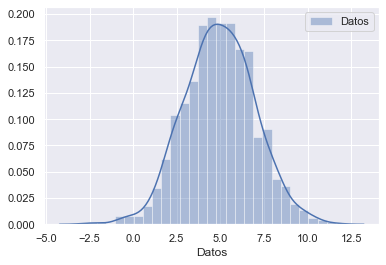

In [3]:
g=sns.distplot(data.Datos, label="Datos")
plt.legend()

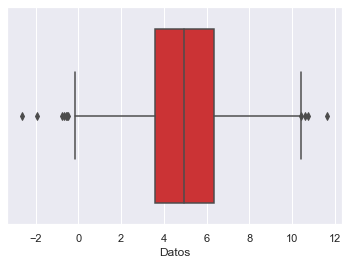

In [4]:
g=sns.boxplot(x=data['Datos'],orient="h", palette="Set1")

In [5]:
describe_df=data.Datos.describe()
describe_df

count    1000.000000
mean        4.952783
std         2.008023
min        -2.619781
25%         3.607388
50%         4.960488
75%         6.332730
max        11.628151
Name: Datos, dtype: float64

### 2. Reescaleo de datos

In [6]:
from sklearn.preprocessing import StandardScaler
valor_medio = data.Datos.median()
std = describe_df['std']
scaler = StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
data['Datos_Reescalados'] = scaler.transform(data)
data.head()

Datos  Datos_Reescalados
0  2.370556          -1.286599
1  3.437876          -0.754805
2  6.300131           0.671318
3  5.403170           0.224406
4  5.722120           0.383323

In [8]:
describe_reescalados=data['Datos_Reescalados'].describe()
describe_reescalados

count    1.000000e+03
mean     1.447176e-16
std      1.000500e+00
min     -3.773042e+00
25%     -6.703452e-01
50%      3.838878e-03
75%      6.875607e-01
max      3.326012e+00
Name: Datos_Reescalados, dtype: float64

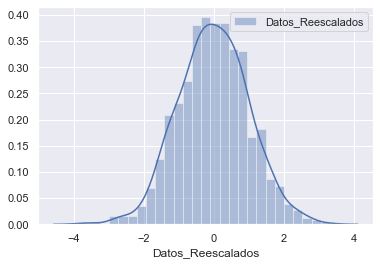

In [9]:
g=sns.distplot(data.Datos_Reescalados, label="Datos_Reescalados")
plt.legend()

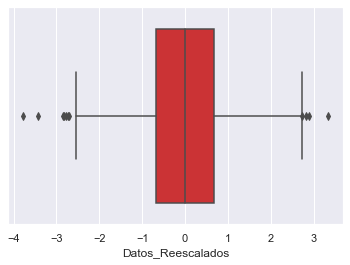

In [10]:
g=sns.boxplot(x=data['Datos_Reescalados'],orient="h", palette="Set1")

### 3. Manejo de outliers

1. Rango intercuartílico.

In [11]:
q25,q75 = (describe_reescalados['25%'],describe_reescalados['75%'])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr

print(q25,q75,iqr, minimo, maximo)

-0.6703451642224537 0.6875606881041205 1.3579058523265743 -2.707203942712315 2.7244194665939823


In [12]:
mascara_outliers = np.logical_or(data['Datos_Reescalados']>maximo, data['Datos_Reescalados']<minimo)
mascara_outliers.sum()

11

2. Regla de las tres sigmas

In [13]:
valor_medio = data['Datos_Reescalados'].median()
std = describe_reescalados['std']
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std

In [14]:
mascara_outliers = np.logical_or(data['Datos_Reescalados']>maximo, data['Datos_Reescalados']<minimo)
mascara_outliers.sum()

3

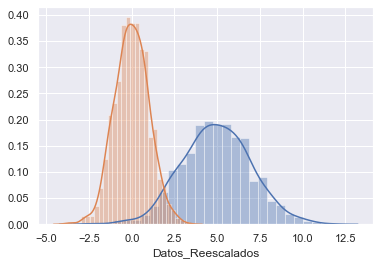

In [16]:
sns.distplot(data['Datos'])
sns.distplot(data['Datos_Reescalados'])

**Para pensar**: ¿se podía aplicar más fácilmente la regla de las tres sigmas usando la columna `Datos_Reescalados`?